In [122]:
import re
import json
import math
from janome.tokenizer import Tokenizer


json_open = open("C:/Users/81906/Documents/create-chunk/history/historyk.json",mode="r",encoding="utf8")
json_load = json.load(json_open)
tokenizer = Tokenizer()
simi = []

def janome(sentense):
    ls = []
    for token in tokenizer.tokenize(sentense):
        if str(token.surface) != ' ':
            ls.append(str(token.surface))            
    return ls

def calc_cos(dictA, dictB):
    """
    cos類似度を計算する関数
    @param dictA 1つ目の文章
    @param dictB 2つ目の文章
    @return cos類似度を計算した結果。0〜1で1に近ければ類似度が高い。
    """
    # 文書Aのベクトル長を計算
    lengthA = 0.0
    for key,value in dictA.items():
        lengthA = lengthA + value*value
    lengthA = math.sqrt(lengthA)

    # 文書Bのベクトル長を計算
    lengthB = 0.0
    for key,value in dictB.items():
        lengthB = lengthB + value*value
    lengthB = math.sqrt(lengthB)

    # AとBの内積を計算
    dotProduct = 0.0
    for keyA,valueA in dictA.items():
        for keyB,valueB in dictB.items():
            if keyA==keyB:
                dotProduct = dotProduct + valueA*valueB
    # cos類似度を計算
    cos = dotProduct / (lengthA*lengthB)
    return cos


def words_to_freqdict(words):
    """
    単語の配列を、単語と頻度の辞書に変換する関数
    例: ["X","X","Y","Z","X"] => {"X":3, "Y":1, "Z":1}
    @param words 単語の配列
    @return 単語と頻度の辞書
    """
    freqdict = {}
    for word in words:
        if word in freqdict:
            freqdict[word] = freqdict[word] + 1
        else:
            freqdict[word] = 1
    return freqdict


def main(text):
    global simi
    if text != "":
        docA = janome(text)
        docB = ["Javascript","Google", "検索", "結果"]
        print(docA,text)

        freqdictA = words_to_freqdict(docA)
        freqdictB = words_to_freqdict(docB)

        cosAB = calc_cos(freqdictA,freqdictB)
        print(cosAB) # 0.134839972493 
        simi.append(cosAB)

with open("C:/Users/81906/Documents/actr6/actr6/distr-model/logs/results2.txt",mode="r",encoding='utf8') as f:
    for line in f.readlines():
        line_split = (re.split( "/n| |t|T", line)[2])
        for i in range(len(json_load)):
            if json_load[i]['id'] == line_split:
                print(json_load[i]['title'])
                main(json_load[i]['title'])
                break

html button - Google 検索
['html', 'button', '-', 'Google', '検索'] html button - Google 検索
0.4472135954999579
Chrome 拡張 Javascript 読込 - Google 検索
['Chrome', '拡張', 'Javascript', '読込', '-', 'Google', '検索'] Chrome 拡張 Javascript 読込 - Google 検索
0.5669467095138409
JavaScript - onrenderedの意味｜teratail
['JavaScript', '-', 'onrendered', 'の', '意味', '｜', 'teratail'] JavaScript - onrenderedの意味｜teratail
0.0
JavaScriptのリストの使い方、追加の仕方 - Qiita
['JavaScript', 'の', 'リスト', 'の', '使い方', '、', '追加', 'の', '仕方', '-', 'Qiita'] JavaScriptのリストの使い方、追加の仕方 - Qiita
0.0
Visual Studio Code - vscodeで行末にセミコロンを追加するショートカットを作りたい｜teratail
['Visual', 'Studio', 'Code', '-', 'vscode', 'で', '行末', 'に', 'セミコロン', 'を', '追加', 'する', 'ショートカット', 'を', '作り', 'たい', '｜', 'teratail'] Visual Studio Code - vscodeで行末にセミコロンを追加するショートカットを作りたい｜teratail
0.0
JavaScript - Javascriptで記述したコードでエラーが出てしまう。｜teratail
['JavaScript', '-', 'Javascript', 'で', '記述', 'し', 'た', 'コード', 'で', 'エラー', 'が', '出', 'て', 'しまう', '。', '｜', 'teratail'] JavaScript - Javascriptで記述したコー

['先進', '的', '学習', '科学', 'と', '工学', '研究', '会', '(', 'ALST', ')', '|', 'SIG', 'on', 'Advanced', 'Learning', 'Science', 'and', 'Technology'] 先進的学習科学と工学研究会(ALST) | SIG on Advanced Learning Science and Technology
0.0
Sponsor & Exhibitor | Cognitive Science Society
['Sponsor', '&', 'Exhibitor', '|', 'Cognitive', 'Science', 'Society'] Sponsor & Exhibitor | Cognitive Science Society
0.0
CogSci 2020 | Cognitive Science Society
['CogSci', '2020', '|', 'Cognitive', 'Science', 'Society'] CogSci 2020 | Cognitive Science Society
0.0
Sponsor & Exhibitor | Cognitive Science Society
['Sponsor', '&', 'Exhibitor', '|', 'Cognitive', 'Science', 'Society'] Sponsor & Exhibitor | Cognitive Science Society
0.0
webhp?hl=ja&sa=X&ved=0ahUKEwjsk8Hys8HoAhXRFIgKHUm9CFYQPAgH - Google 検索
['webhp', '?', 'hl', '=', 'ja', '&', 'sa', '=', 'X', '&', 'ved', '=', '0', 'ahUKEwjsk', '8', 'Hys', '8', 'HoAhXRFIgKHUm', '9', 'CFYQPAgH', '-', 'Google', '検索'] webhp?hl=ja&sa=X&ved=0ahUKEwjsk8Hys8HoAhXRFIgKHUm9CFYQPAgH - Google 検索
0.1

['ノート', 'パソコン', 'を', 'モニター', 'に', 'する', '-', 'Google', '検索'] ノートパソコンをモニターにする - Google 検索
0.3333333333333333
静岡大学 - Google 検索
['静岡大学', '-', 'Google', '検索'] 静岡大学 - Google 検索
0.5
javascript サムネイル 作成 - Google 検索
['javascript', 'サムネイル', '作成', '-', 'Google', '検索'] javascript サムネイル 作成 - Google 検索
0.4082482904638631
Chrome拡張機能開発　chrome.browserAction アクションボタンのサンプル - なろう分析記録
['Chrome', '拡張', '機能', '開発', '\u3000', 'chrome', '.', 'browserAction', 'アクション', 'ボタン', 'の', 'サンプル', '-', 'なろ', 'う', '分析', '記録'] Chrome拡張機能開発　chrome.browserAction アクションボタンのサンプル - なろう分析記録
0.0
メタ分析とは - Google 検索
['メタ', '分析', 'と', 'は', '-', 'Google', '検索'] メタ分析とは - Google 検索
0.3779644730092272
超心理学講座・メタ分析
['超', '心理', '学', '講座', '・', 'メタ', '分析'] 超心理学講座・メタ分析
0.0
大発見！「ネガティブ感情の悪循環」的な概念は心理学・脳科学・自己啓発でも悪者だった - うつ治療に学ぶ医学的ｽﾄﾚｽ解消 ~ﾒﾝﾀﾙﾊｯｸ
['大発見', '！', '「', 'ネガティブ', '感情', 'の', '悪循環', '」', '的', 'な', '概念', 'は', '心理', '学', '・', '脳', '科学', '・', '自己', '啓発', 'で', 'も', '悪者', 'だっ', 'た', '-', 'うつ', '治療', 'に', '学ぶ', '医学', '的', 'ｽﾄﾚｽ', '解消', '~', 'ﾒﾝ

In [123]:
import collections
for i in range(len(simi)):
    simi[i] = round(simi[i],1)
simi

[0.4,
 0.6,
 0.0,
 0.0,
 0.0,
 0.1,
 0.0,
 0.0,
 0.0,
 0.4,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.1,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.3,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.4,
 0.4,
 0.0,
 0.0,
 0.0,
 0.2,
 0.0,
 0.0,
 0.0,
 0.0,
 0.4,
 0.4,
 0.4,
 0.4,
 0.0,
 0.0,
 0.0,
 0.4,
 0.5,
 0.4,
 0.4,
 0.4,
 0.4,
 0.0,
 0.0,
 0.0,
 0.4,
 0.4,
 0.0,
 0.4,
 0.4,
 0.4,
 0.5,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.3,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.2,
 0.2,
 0.2,
 0.4,
 0.6,
 0.4,
 0.0,
 0.4,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.6,
 0.0,
 0.6,
 0.4,
 0.4,
 0.4,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.3,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.1,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0

(array([145.,   4.,   0.,   6.,   0.,   5.,  32.,   0.,   3.,   4.]),
 array([0.  , 0.06, 0.12, 0.18, 0.24, 0.3 , 0.36, 0.42, 0.48, 0.54, 0.6 ]),
 <a list of 10 Patch objects>)

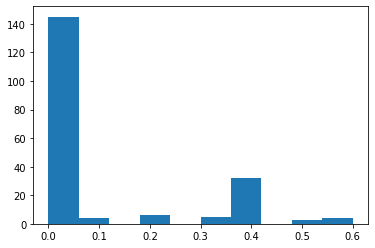

In [124]:
plt.hist(simi)

(array([815.,  28.,  85.,   0.,  41., 199.,   0.,  33.,   7.,   2.]),
 array([0.  , 0.07, 0.14, 0.21, 0.28, 0.35, 0.42, 0.49, 0.56, 0.63, 0.7 ]),
 <a list of 10 Patch objects>)

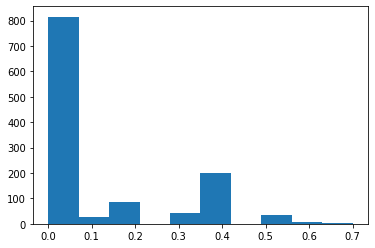

In [118]:
plt.hist(simi)